In [1]:
# Import all the needed libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels
import statsmodels.api as sm
from  statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
# Read data from the dataset
bike_rental = pd.read_csv("day.csv")

In [3]:
bike_rental.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_rental.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

bike_rental.info()

In [6]:
bike_rental.shape

(730, 16)

In [7]:
# Get unique counts of columns
bike_rental.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [8]:
# Get the different categorical values of the categorical columns
bike_rental['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [9]:
bike_rental['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [10]:
bike_rental['mnth'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [11]:
bike_rental['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [12]:
bike_rental['weekday'].value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [13]:
bike_rental['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [14]:
bike_rental['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [15]:
# Convert temperature, atemperature, humidity,windspeed to 1 decimal places for better representation
bike_rental['temp'] = bike_rental['temp'].round(decimals = 1 )

In [16]:
bike_rental['atemp'] = bike_rental['atemp'].round(decimals = 1 )

In [17]:
bike_rental['hum'] = bike_rental['hum'].round(decimals = 1 )

In [18]:
bike_rental['windspeed'] = bike_rental['windspeed'].round(decimals = 1 )

In [19]:
bike_rental.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit  temp  atemp   hum  windspeed  casual  registered   cnt  
0           2  14.1   18.2  80.6       10.7     331         654   985  
1           2  14.9   17.7  69.6       16.7     131         670   801  
2           1   8.1    9.5  43.7       16.6     120        1229  1349  
3           1   8.2   10.6  59.0       10.7     108        1454  1562  
4           1   9.3   11.5  43.7       12.5      82        1518  1600

In [20]:
# Convert season to string data
bike_rental['season'] =  bike_rental['season'].astype(str)

In [21]:
bike_rental['season'].describe()

count     730
unique      4
top         3
freq      188
Name: season, dtype: object

In [22]:
def season_map(x):
    if x == '1':
        return 'spring'
    elif x == '2':
        return 'summer'
    elif x == '3':
        return 'fall'
    elif x == '4':
        return 'winter'

In [23]:
bike_rental['season'] = bike_rental['season'].apply(season_map)

In [24]:
bike_rental['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [25]:
# Convert weather situation to string data
def weathersit_map(x):
    y = str(x)
    if y =='1':
        return 'clear'
    elif y =='2':
        return 'misty'
    elif y == '3':
        return 'light_shower'
    elif y == '4':
        return 'heavy_shower'

In [26]:
bike_rental['weathersit'] =  bike_rental['weathersit'].apply(weathersit_map)

In [27]:
bike_rental['weathersit'].head()

0    misty
1    misty
2    clear
3    clear
4    clear
Name: weathersit, dtype: object

In [28]:
# Convert weekday situation to string data
def weekday_map(x):
    y = str(x)
    if y =='1':
        return 'Monday'
    elif y =='2':
        return 'Tuesday'
    elif y == '3':
        return 'Wednesday'
    elif y == '4':
        return 'Thursday'
    elif y == '5':
        return 'Friday'
    elif y == '6':
        return 'Saturday'
    elif y == '0':
        return 'Sunday'

In [29]:
bike_rental['weekday'] =  bike_rental['weekday'].apply(weekday_map)

In [30]:
# Convert month situation to string data
def month_map(x):
    y = str(x)
    if y =='1':
        return 'Jan'
    elif y =='2':
        return 'Feb'
    elif y == '3':
        return 'Mar'
    elif y == '4':
        return 'Apr'
    elif y == '5':
        return 'May'
    elif y == '6':
        return 'Jun'
    elif y == '7':
        return 'Jul'
    elif y == '8':
        return 'Aug'
    elif y == '9':
        return 'Sep'
    elif y == '10':
        return 'Oct'
    elif y == '11':
        return 'Nov'
    elif y == '12':
        return 'Dec'

In [31]:
bike_rental['mnth'] =  bike_rental['mnth'].apply(month_map)

In [32]:
# Drop unwanted columns -> instant as this a record count which is unique to every record
# casual and registered as we need only the final cnt 
# dteday as this is also unique to every record
bike_rental = bike_rental.drop(columns = ['casual','instant','registered','dteday'],axis = 1)

### Univariate analysis

<Axes: xlabel='season', ylabel='cnt'>

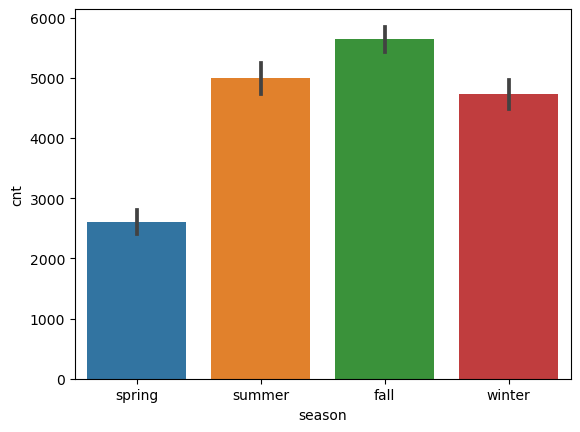

In [33]:
sb.barplot(data=bike_rental,x='season',y='cnt')

<Axes: xlabel='weathersit', ylabel='cnt'>

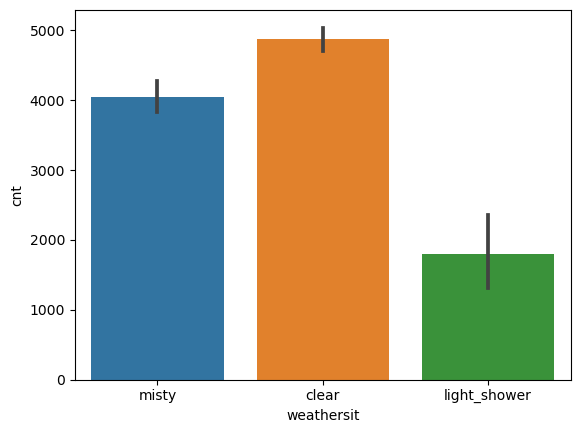

In [34]:
sb.barplot(data=bike_rental,x='weathersit',y='cnt')

<Axes: xlabel='yr', ylabel='cnt'>

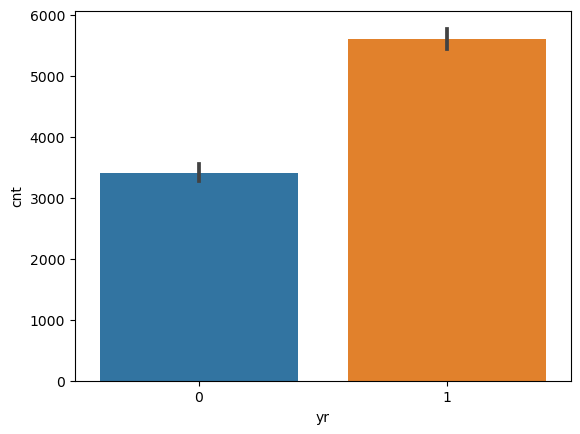

In [35]:
sb.barplot(data=bike_rental,x='yr',y='cnt')

<Axes: xlabel='mnth', ylabel='cnt'>

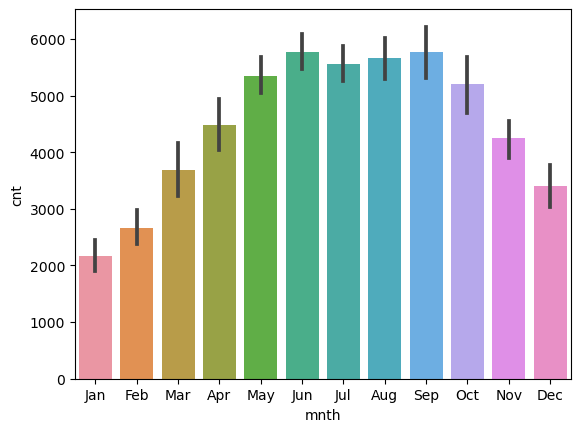

In [36]:
sb.barplot(data=bike_rental,x='mnth',y='cnt')

<Axes: xlabel='holiday', ylabel='cnt'>

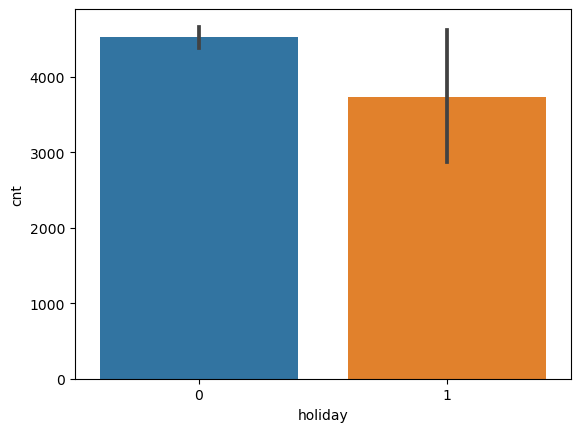

In [37]:
sb.barplot(data=bike_rental,x='holiday',y='cnt')

<Axes: xlabel='weekday', ylabel='cnt'>

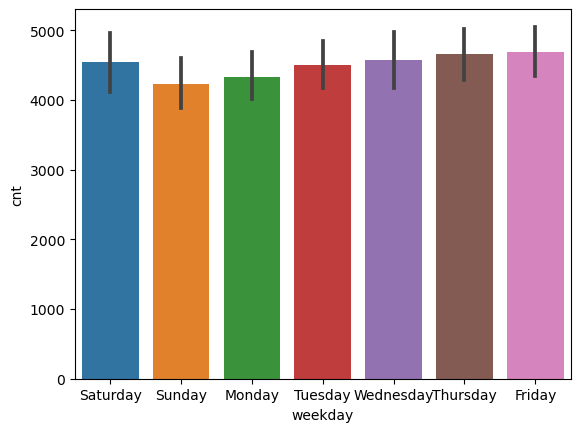

In [38]:
sb.barplot(data=bike_rental,x='weekday',y='cnt')

<Axes: xlabel='workingday', ylabel='cnt'>

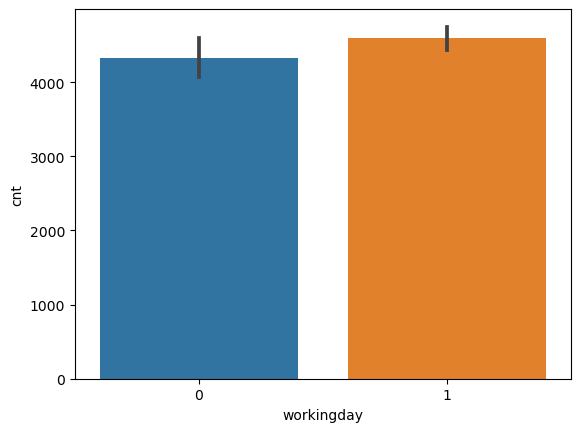

In [39]:
sb.barplot(data=bike_rental,x='workingday',y='cnt')

(array([  6.,  36.,  89., 104.,  93.,  81.,  92., 102., 105.,  22.]),
 array([ 2.4 ,  5.69,  8.98, 12.27, 15.56, 18.85, 22.14, 25.43, 28.72,
        32.01, 35.3 ]),
 <BarContainer object of 10 artists>)

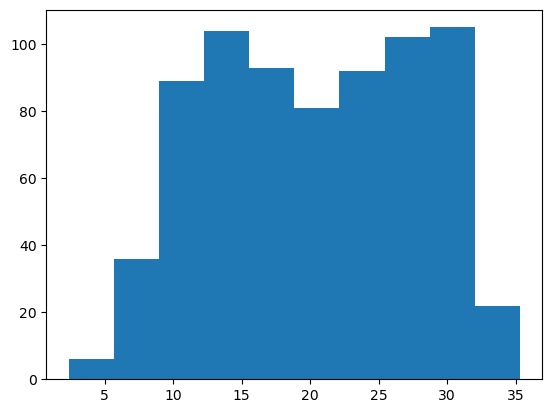

In [40]:
pl.hist(bike_rental['temp'])

(array([ 11.,  34.,  97.,  98.,  97.,  93., 119., 115.,  58.,   8.]),
 array([ 4. ,  7.8, 11.6, 15.4, 19.2, 23. , 26.8, 30.6, 34.4, 38.2, 42. ]),
 <BarContainer object of 10 artists>)

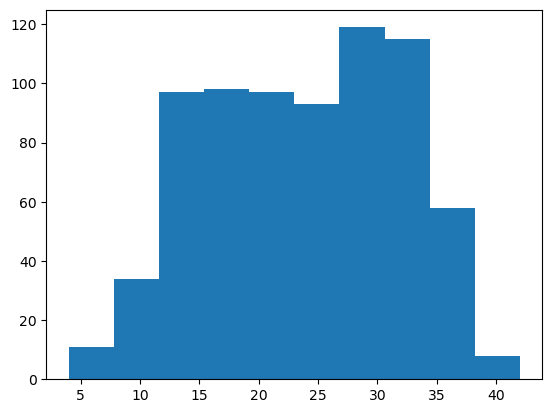

In [41]:
pl.hist(bike_rental['atemp'])

(array([  1.,   1.,   3.,  18.,  93., 175., 164., 168.,  73.,  34.]),
 array([ 0.  ,  9.72, 19.44, 29.16, 38.88, 48.6 , 58.32, 68.04, 77.76,
        87.48, 97.2 ]),
 <BarContainer object of 10 artists>)

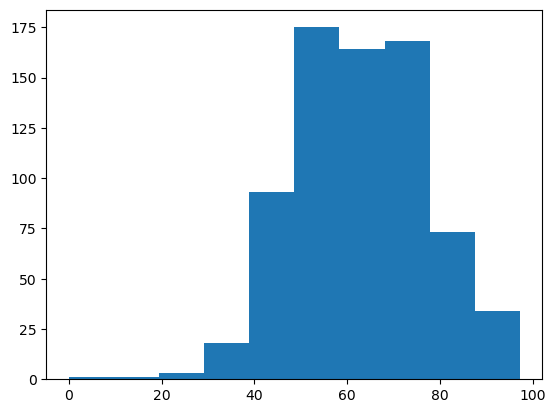

In [42]:
pl.hist(bike_rental['hum'])

(array([ 26.,  95., 192., 171., 128.,  62.,  35.,  14.,   6.,   1.]),
 array([ 1.5 ,  4.75,  8.  , 11.25, 14.5 , 17.75, 21.  , 24.25, 27.5 ,
        30.75, 34.  ]),
 <BarContainer object of 10 artists>)

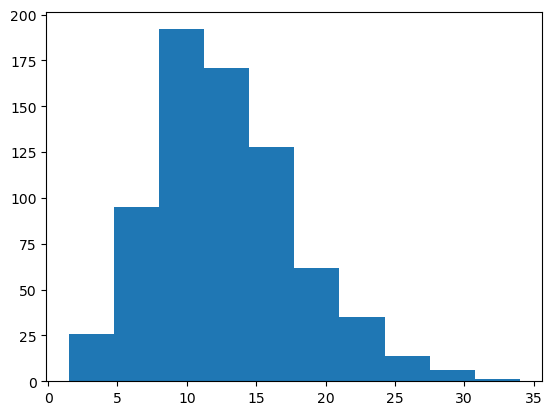

In [43]:
pl.hist(bike_rental['windspeed'])

In [44]:
pl.figure(figsize=(20,20))
sb.heatmap(bike_rental.corr(),annot=True)
pl.show()

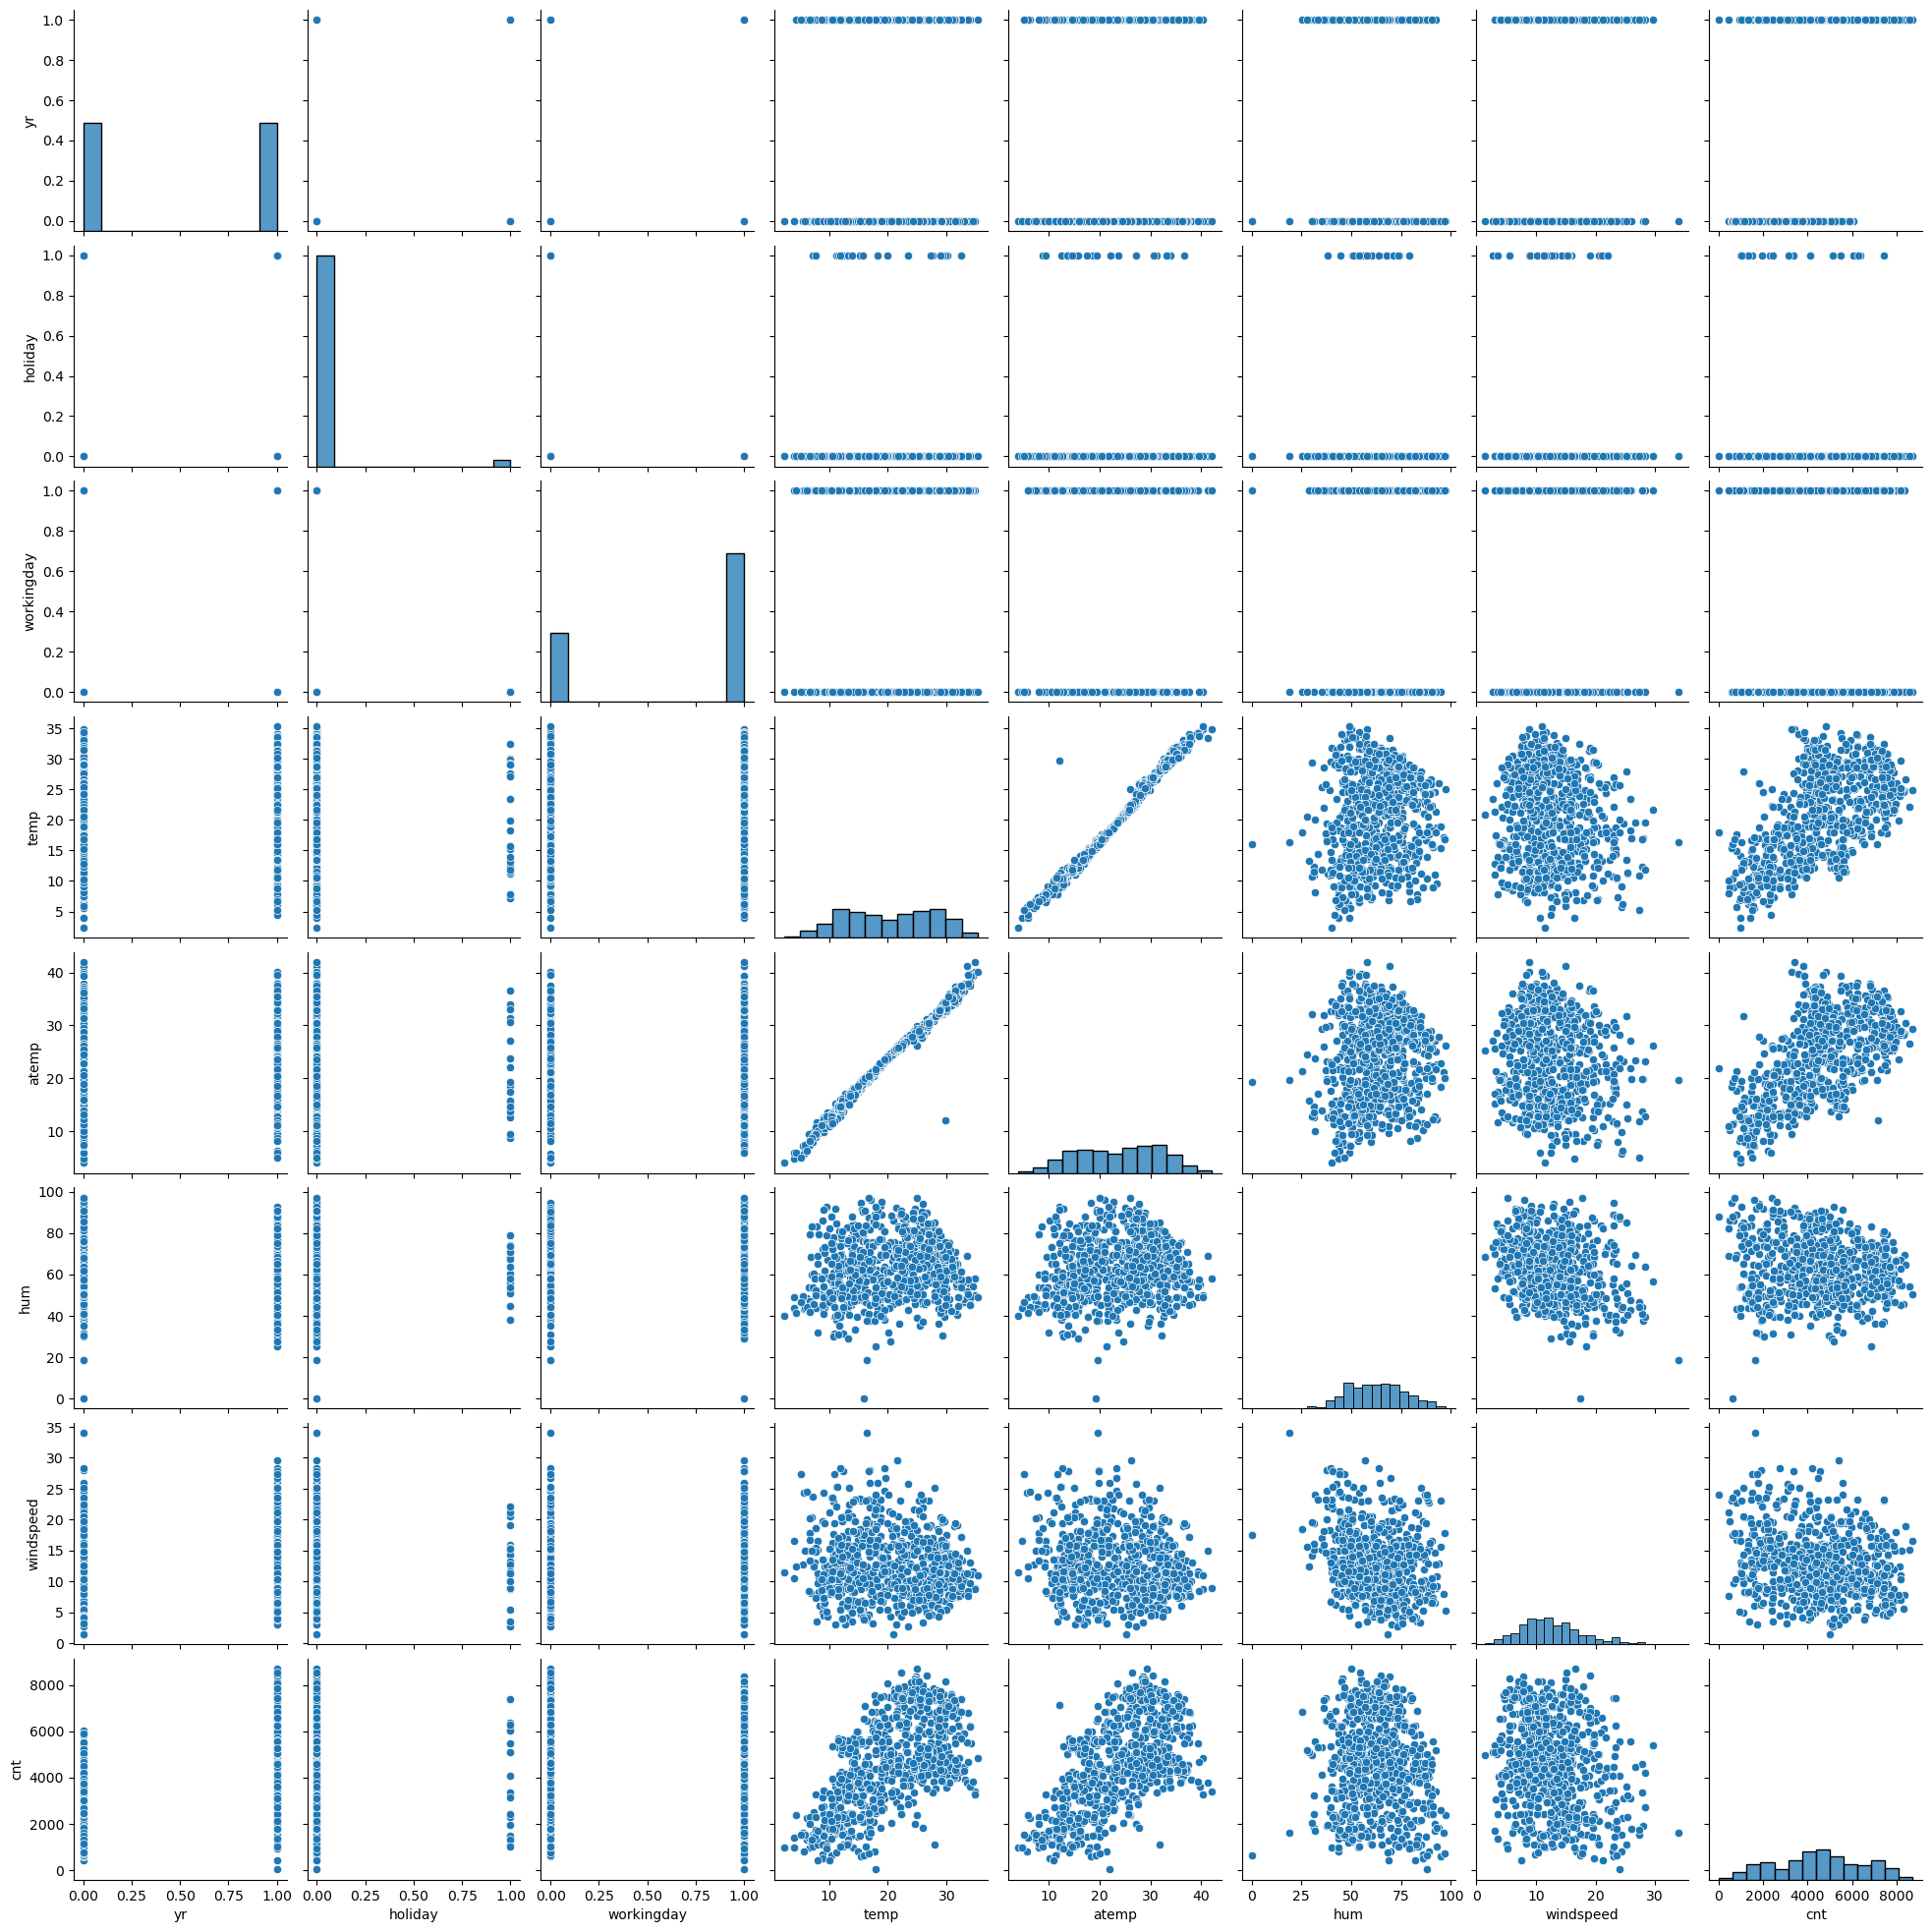

In [45]:
sb.pairplot(bike_rental)


In [46]:
sb.boxplot(data=bike_rental, x="season", y="cnt")

<Axes: xlabel='season', ylabel='cnt'>

<Axes: xlabel='yr', ylabel='cnt'>

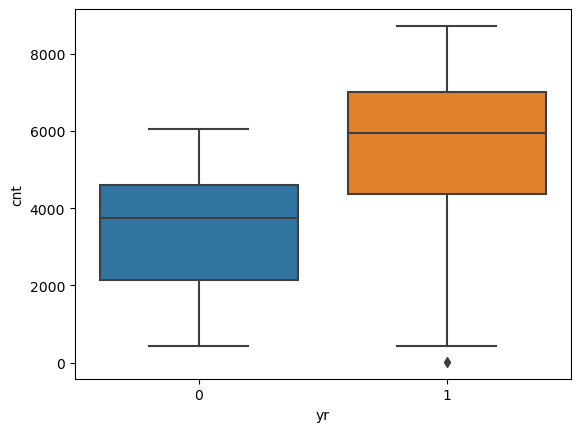

In [47]:
sb.boxplot(data=bike_rental, x="yr", y="cnt")

<Axes: xlabel='mnth', ylabel='cnt'>

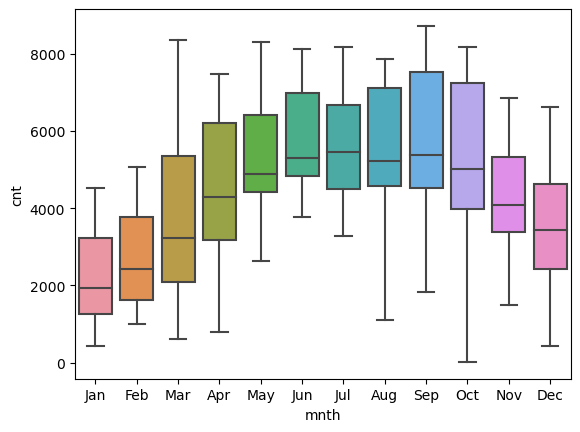

In [48]:
sb.boxplot(data=bike_rental, x="mnth", y="cnt")

<Axes: xlabel='holiday', ylabel='cnt'>

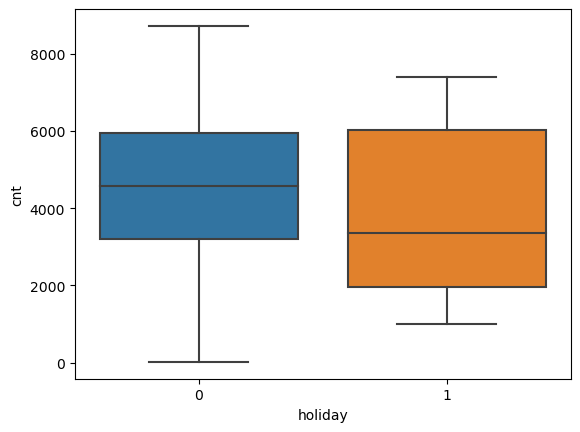

In [49]:
sb.boxplot(data=bike_rental, x="holiday", y="cnt")

<Axes: xlabel='weekday', ylabel='cnt'>

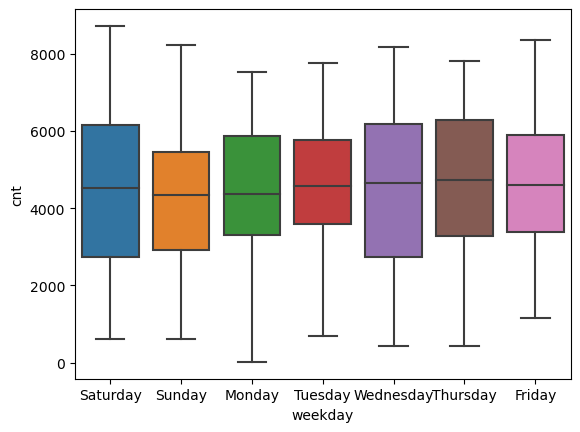

In [50]:
sb.boxplot(data=bike_rental, x="weekday", y="cnt")

<Axes: xlabel='workingday', ylabel='cnt'>

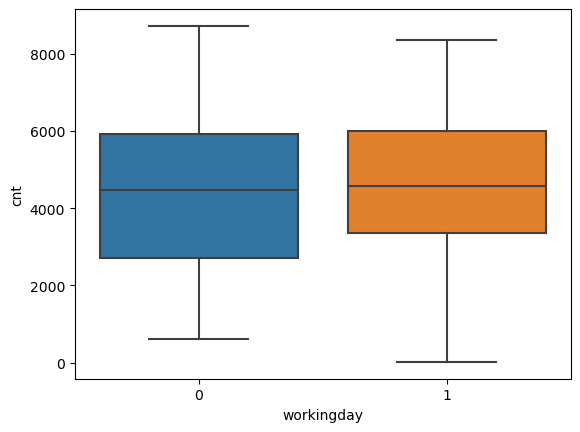

In [51]:
sb.boxplot(data=bike_rental, x="workingday", y="cnt")

<Axes: xlabel='weathersit', ylabel='cnt'>

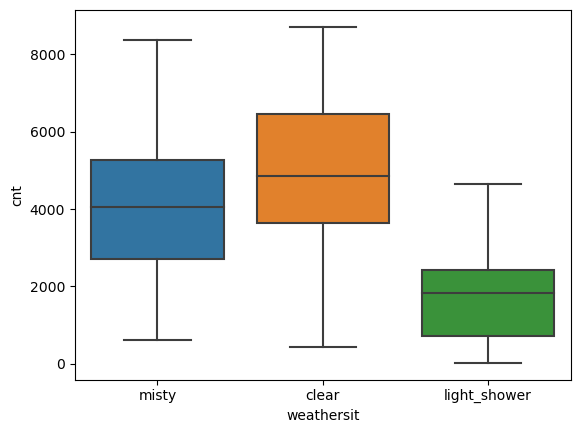

In [52]:
sb.boxplot(data=bike_rental, x="weathersit", y="cnt")

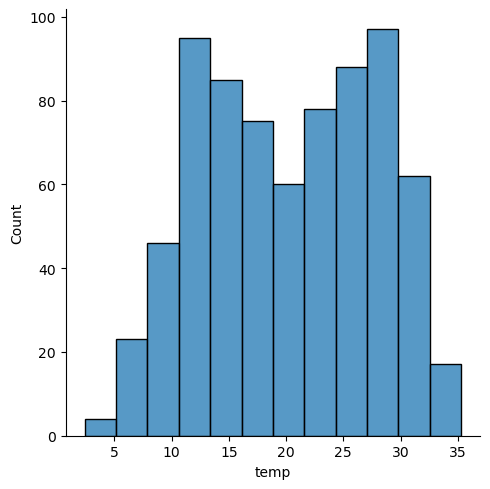

In [53]:
sb.displot(bike_rental['temp'],kind='hist')

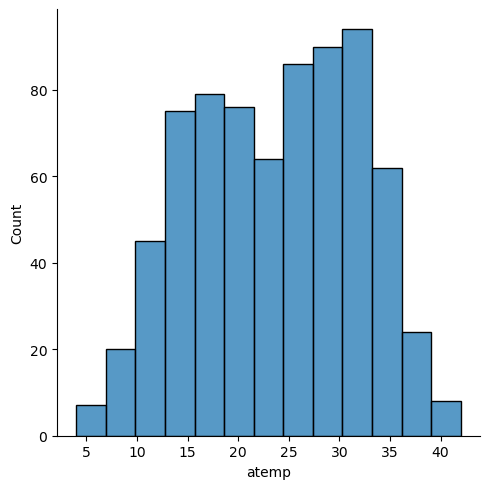

In [54]:
sb.displot(bike_rental['atemp'],kind='hist')

<Axes: xlabel='temp', ylabel='cnt'>

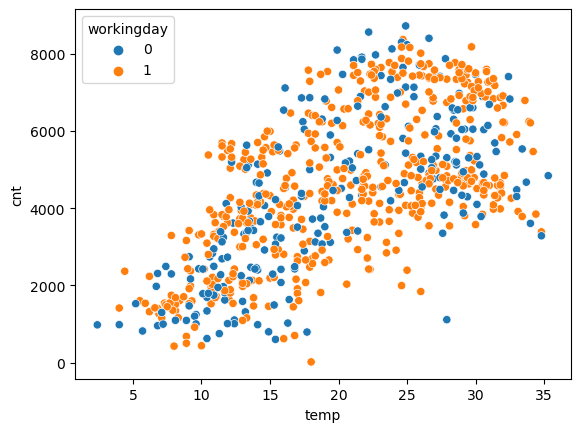

In [55]:
sb.scatterplot(x=bike_rental['temp'],y=bike_rental['cnt'],hue=bike_rental['workingday'])

<Axes: xlabel='hum', ylabel='cnt'>

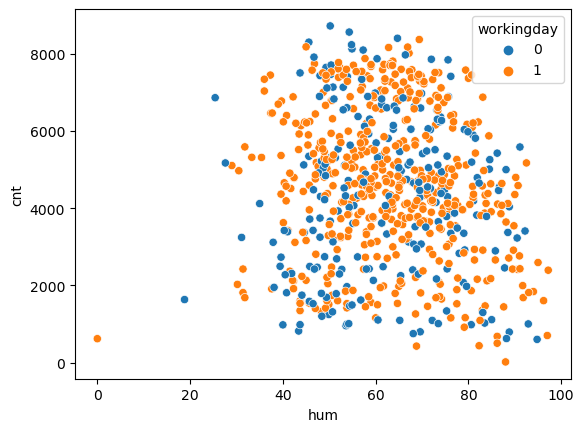

In [56]:
sb.scatterplot(x=bike_rental['hum'],y=bike_rental['cnt'],hue=bike_rental['workingday'])

In [57]:
pd.crosstab(bike_rental.season,bike_rental.mnth)

mnth    Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
season                                                            
fall      0   62    0    0    0   62   20    0    0    0    0   44
spring    0    0   22   56   62    0    0   40    0    0    0    0
summer   60    0    0    0    0    0   40   22   62    0    0    0
winter    0    0   40    0    0    0    0    0    0   60   62   16

In [58]:
pd.crosstab(bike_rental.workingday,bike_rental.holiday)

holiday       0   1
workingday         
0           210  21
1           499   0

In [59]:
pd.crosstab(bike_rental.weathersit,bike_rental.mnth)

mnth          Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
weathersit                                                              
clear          37   43   32   37   37   51   46   36   37   42   32   33
light_shower    2    0    3    1    1    1    0    2    0    3    5    3
misty          21   19   27   18   24   10   14   24   25   15   25   24

In [60]:
pd.crosstab(bike_rental.weathersit,bike_rental.season)

season        fall  spring  summer  winter
weathersit                                
clear          136     111     113     103
light_shower     4       4       3      10
misty           48      65      68      65

##### Insights from data analysis:
###### 1. There are 730 records and 16 columns , there are no missing values.
###### 2. Here instant and dteday have unique value for every entry.
###### 3. Cnt is sum of casual and registered
###### 4. Workingday contains information from holiday and weekday, where 1 represents working day and 0 represents non working day.
###### 5. Below are the categorical columns
######   season ,yr ,mnth, holiday, weekday, workingday, weathersit 
###### 6. Below are the continuous columns
######  Temp, atemp, hum, windspeed
###### 7. The max no. of bikes are rented in the season  fall where the median count is approximately above 5000 followed by summer
###### 8. The max no. of bikes are rented when the weather is clear where the median count is approximately 5000
###### 9. Year on year the bike rental count increases but declines in the end of 2019.
###### 10. Bikes rented is more on working days when compared to non working days.
###### 11. Positive correaltion between cnt and temp and cnt and atemp
###### 12. There seems a strong positive correlation between temp and atemp which are predictors

##### Model bulding using RCA approach

In [61]:
# Dummy variables for season
season = pd.get_dummies(bike_rental['season'],drop_first=True)
season

spring  summer  winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]

In [62]:
#### Dummy variables for weathersit
weathersit = pd.get_dummies(bike_rental['weathersit'],drop_first=True)
weathersit

light_shower  misty
0               0      1
1               0      1
2               0      0
3               0      0
4               0      0
..            ...    ...
725             0      1
726             0      1
727             0      1
728             0      0
729             0      1

[730 rows x 2 columns]

In [63]:
# Dummy variables for month
month = pd.get_dummies(bike_rental['mnth'],drop_first=True)
month

Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0      0    0    0    1    0    0    0    0    0    0    0
1      0    0    0    1    0    0    0    0    0    0    0
2      0    0    0    1    0    0    0    0    0    0    0
3      0    0    0    1    0    0    0    0    0    0    0
4      0    0    0    1    0    0    0    0    0    0    0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
725    0    1    0    0    0    0    0    0    0    0    0
726    0    1    0    0    0    0    0    0    0    0    0
727    0    1    0    0    0    0    0    0    0    0    0
728    0    1    0    0    0    0    0    0    0    0    0
729    0    1    0    0    0    0    0    0    0    0    0

[730 rows x 11 columns]

In [64]:
# Dummy variables for weekday
weekday = pd.get_dummies(bike_rental['weekday'],drop_first=True)
weekday

Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0         0         1       0         0        0          0
1         0         0       1         0        0          0
2         1         0       0         0        0          0
3         0         0       0         0        1          0
4         0         0       0         0        0          1
..      ...       ...     ...       ...      ...        ...
725       0         0       0         1        0          0
726       0         0       0         0        0          0
727       0         1       0         0        0          0
728       0         0       1         0        0          0
729       1         0       0         0        0          0

[730 rows x 6 columns]

In [65]:
bike_rental = pd.concat([bike_rental,weathersit,season,month,weekday],axis=1)

In [66]:
bike_rental.head()

season  yr mnth  holiday    weekday  workingday weathersit  temp  atemp  \
0  spring   0  Jan        0   Saturday           0      misty  14.1   18.2   
1  spring   0  Jan        0     Sunday           0      misty  14.9   17.7   
2  spring   0  Jan        0     Monday           1      clear   8.1    9.5   
3  spring   0  Jan        0    Tuesday           1      clear   8.2   10.6   
4  spring   0  Jan        0  Wednesday           1      clear   9.3   11.5   

    hum  ...  May  Nov  Oct  Sep  Monday  Saturday  Sunday  Thursday  Tuesday  \
0  80.6  ...    0    0    0    0       0         1       0         0        0   
1  69.6  ...    0    0    0    0       0         0       1         0        0   
2  43.7  ...    0    0    0    0       1         0       0         0        0   
3  59.0  ...    0    0    0    0       0         0       0         0        1   
4  43.7  ...    0    0    0    0       0         0       0         0        0   

   Wednesday  
0          0  
1          0  
2          0  
3          0  
4          1  

[5 rows x 34 columns]

In [67]:
# Drop the original variables as there are newly derived columns from the categorical data of 'season', 'weathersit','mnth','weekday'
bike_rental = bike_rental.drop(columns=['season', 'weathersit','mnth','weekday'])

In [68]:
bike_rental.head()

yr  holiday  workingday  temp  atemp   hum  windspeed   cnt  light_shower  \
0   0        0           0  14.1   18.2  80.6       10.7   985             0   
1   0        0           0  14.9   17.7  69.6       16.7   801             0   
2   0        0           1   8.1    9.5  43.7       16.6  1349             0   
3   0        0           1   8.2   10.6  59.0       10.7  1562             0   
4   0        0           1   9.3   11.5  43.7       12.5  1600             0   

   misty  ...  May  Nov  Oct  Sep  Monday  Saturday  Sunday  Thursday  \
0      1  ...    0    0    0    0       0         1       0         0   
1      1  ...    0    0    0    0       0         0       1         0   
2      0  ...    0    0    0    0       1         0       0         0   
3      0  ...    0    0    0    0       0         0       0         0   
4      0  ...    0    0    0    0       0         0       0         0   

   Tuesday  Wednesday  
0        0          0  
1        0          0  
2        0          0  
3        1          0  
4        0          1  

[5 rows x 30 columns]

In [69]:
df_train,df_test = train_test_split(bike_rental,train_size=0.7,random_state= 100)
df_train.shape

(510, 30)

In [70]:
# Scaling using MinMax scaler
scaler = MinMaxScaler()

In [71]:
# Scaling the numeric variables to similar magnitude for interpretability of the model
numeric_var = ['temp','atemp','hum','windspeed','cnt']
df_train[numeric_var] = scaler.fit_transform(df_train[numeric_var])
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.814590  0.765789  0.725773   0.266026   
426   1        0           0  0.443769  0.439474  0.640206   0.256410   
728   1        0           0  0.246201  0.200000  0.497938   0.663462   
482   1        0           0  0.395137  0.392105  0.505155   0.189103   
111   0        0           1  0.346505  0.318421  0.752577   0.381410   

          cnt  light_shower  misty  ...  May  Nov  Oct  Sep  Monday  Saturday  \
576  0.827658             0      0  ...    0    0    0    0       0         0   
426  0.465255             0      1  ...    0    0    0    0       0         1   
728  0.204096             0      0  ...    0    0    0    0       0         0   
482  0.482973             0      1  ...    0    0    0    0       0         1   
111  0.191095             0      1  ...    0    0    0    0       0         0   

     Sunday  Thursday  Tuesday  Wednesday  
576       0         0        1          0  
426       0         0        0          0  
728       1         0        0          0  
482       0         0        0          0  
111       0         0        0          0  

[5 rows x 30 columns]

In [72]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.538256    0.513189    0.650754   
std      0.500429    0.157763    0.468282    0.225871    0.212866    0.145914   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.341185    0.332237    0.538402   
50%      1.000000    0.000000    1.000000    0.544073    0.528947    0.654124   
75%      1.000000    0.000000    1.000000    0.735562    0.689474    0.755155   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt  light_shower       misty  ...         May  \
count  510.000000  510.000000    510.000000  510.000000  ...  510.000000   
mean     0.321669    0.513499      0.029412    0.345098  ...    0.084314   
std      0.169621    0.224421      0.169124    0.475867  ...    0.278131   
min      0.000000    0.000000      0.000000    0.000000  ...    0.000000   
25%      0.198718    0.356420      0.000000    0.000000  ...    0.000000   
50%      0.296474    0.518638      0.000000    0.000000  ...    0.000000   
75%      0.416667    0.684710      0.000000    1.000000  ...    0.000000   
max      1.000000    1.000000      1.000000    1.000000  ...    1.000000   

              Nov         Oct         Sep      Monday    Saturday      Sunday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.086275    0.084314    0.080392    0.150980    0.154902    0.143137   
std      0.281045    0.278131    0.272166    0.358381    0.362166    0.350557   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         Thursday     Tuesday   Wednesday  
count  510.000000  510.000000  510.000000  
mean     0.133333    0.131373    0.158824  
std      0.340268    0.338139    0.365870  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [73]:
# The target variable on y_train and all the other predictors on X_train
y_train = df_train.pop('cnt')
X_train = df_train

##### RFE way

In [74]:
# Importing RFE and LinearRegression
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

#rfe = RFE(lm, n_features_to_select=20)            # running RFE
rfe = RFE(lm,n_features_to_select=15)         
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('light_shower', True, 1),
 ('misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', False, 2),
 ('Aug', False, 9),
 ('Dec', False, 10),
 ('Feb', False, 5),
 ('Jan', False, 12),
 ('Jul', False, 3),
 ('Jun', False, 14),
 ('Mar', False, 4),
 ('May', True, 1),
 ('Nov', False, 6),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Monday', False, 7),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 8),
 ('Tuesday', False, 13),
 ('Wednesday', False, 11)]

In [75]:
# The most significant features are determined from RFE first 
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'light_shower', 'misty', 'spring', 'May', 'Oct', 'Sep', 'Saturday',
       'Sunday'],
      dtype='object')

##### Building model using statsmodel, for the detailed statistics

In [76]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [77]:
X_train_lm = sm.add_constant(X_train_rfe)

In [78]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.1
Date:                Sat, 26 Aug 2023   Prob (F-statistic):          7.25e-186
Time:                        19:15:04   Log-Likelihood:                 504.41
No. Observations:                 510   AIC:                            -978.8
Df Residuals:                     495   BIC:                            -915.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2880      0.024     11.923   

In [79]:
X_train_copy = X_train_lm.drop(columns=['const'], axis=1)

In [80]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_copy
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4          atemp  51.12
3           temp  50.22
2     workingday  36.57
13      Saturday   8.94
14        Sunday   8.72
1        holiday   2.32
5            hum   1.88
9         spring   1.74
8          misty   1.55
7   light_shower   1.27
6      windspeed   1.20
11           Oct   1.15
12           Sep   1.12
10           May   1.11
0             yr   1.03

##### Model 1a

In [ ]:
# Remove atemp as it has high p value and high vif
X_train_1a = X_train_rfe.drop(["atemp"], axis = 1)

In [82]:
X_train_lm_1a = sm.add_constant(X_train_1a)
lm_1a = sm.OLS(y_train,X_train_lm_1a).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_1a.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.3
Date:                Sat, 26 Aug 2023   Prob (F-statistic):          7.06e-187
Time:                        19:15:04   Log-Likelihood:                 504.07
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     496   BIC:                            -920.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2896      0.024     12.032   

In [83]:
X_train_copy_1a = X_train_lm_1a.drop(columns=['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_copy_1a
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2     workingday  36.28
12      Saturday   8.88
13        Sunday   8.66
1        holiday   2.32
4            hum   1.87
3           temp   1.75
8         spring   1.73
7          misty   1.54
6   light_shower   1.26
5      windspeed   1.17
10           Oct   1.14
11           Sep   1.12
9            May   1.11
0             yr   1.03

##### Model 1b

In [84]:
# Next remove holiday as it has high p value 
X_train_1b = X_train_rfe.drop(["atemp","holiday"], axis = 1)

In [85]:
X_train_lm_1b = sm.add_constant(X_train_1b)
lm_1b = sm.OLS(y_train,X_train_lm_1b).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_1b.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.3
Date:                Sat, 26 Aug 2023   Prob (F-statistic):          7.06e-187
Time:                        19:15:04   Log-Likelihood:                 504.07
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     496   BIC:                            -920.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3005      0.039      7.788   

In [86]:
X_train_copy_1b = X_train_lm_1b.drop(columns=['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_copy_1b
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3            hum  24.63
1     workingday  16.45
2           temp  10.90
4      windspeed   4.49
11      Saturday   4.44
12        Sunday   4.34
6          misty   2.19
7         spring   2.10
0             yr   2.06
9            Oct   1.25
5   light_shower   1.23
10           Sep   1.22
8            May   1.21

##### Model 1c

In [87]:
# Next remove sunday as it has high p value 
X_train_1c = X_train_rfe.drop(["atemp","holiday","Sunday"], axis = 1)

In [88]:
X_train_lm_1c = sm.add_constant(X_train_1c)
lm_1c = sm.OLS(y_train,X_train_lm_1c).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_1c.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.7
Date:                Sat, 26 Aug 2023   Prob (F-statistic):          2.11e-187
Time:                        19:15:04   Log-Likelihood:                 502.52
No. Observations:                 510   AIC:                            -979.0
Df Residuals:                     497   BIC:                            -924.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3401      0.031     10.918   

In [89]:
X_train_copy_1c = X_train_lm_1c.drop(columns=['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_copy_1c
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3            hum  16.57
2           temp  10.18
1     workingday   4.62
4      windspeed   4.05
6          misty   2.11
0             yr   2.04
7         spring   2.01
11      Saturday   1.81
9            Oct   1.25
10           Sep   1.21
5   light_shower   1.20
8            May   1.20

#### Model 1d

In [90]:
# Next remove hum as it has high vif
X_train_1d = X_train_rfe.drop(["atemp","holiday","Sunday","hum"], axis = 1)

In [91]:
X_train_lm_1d = sm.add_constant(X_train_1d)
lm_1d = sm.OLS(y_train,X_train_lm_1d).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_1d.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.9
Date:                Sat, 26 Aug 2023   Prob (F-statistic):          5.90e-186
Time:                        19:15:04   Log-Likelihood:                 496.27
No. Observations:                 510   AIC:                            -968.5
Df Residuals:                     498   BIC:                            -917.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2571      0.021     12.538   

In [92]:
X_train_copy_1d = X_train_lm_1d.drop(columns=['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_copy_1d
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           temp  5.51
1     workingday  4.26
3      windspeed  3.97
0             yr  2.04
10      Saturday  1.73
6         spring  1.69
5          misty  1.54
9            Sep  1.20
7            May  1.19
8            Oct  1.16
4   light_shower  1.10

#### Model 1e

In [93]:
# Remove may as it has the least coefficient value 
X_train_1e = X_train_rfe.drop(["atemp","holiday","Sunday","hum","May"], axis = 1)

In [94]:
X_train_lm_1e = sm.add_constant(X_train_1e)
lm_1e = sm.OLS(y_train,X_train_lm_1e).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_1e.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Sat, 26 Aug 2023   Prob (F-statistic):          2.96e-186
Time:                        19:15:05   Log-Likelihood:                 494.12
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     499   BIC:                            -919.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2591      0.021     12.612   

In [95]:
X_train_copy_1e = X_train_lm_1e.drop(columns=['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_copy_1e
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          temp  5.37
1    workingday  4.25
3     windspeed  3.96
0            yr  2.03
9      Saturday  1.73
6        spring  1.66
5         misty  1.52
8           Sep  1.17
7           Oct  1.15
4  light_shower  1.10

#### Model 1f

In [96]:
# Next remove Working day as we know temperature is really important and the next high VIF is for working day
X_train_1f = X_train_rfe.drop(["atemp","holiday","Sunday","hum","May","workingday"], axis = 1)

In [97]:
X_train_lm_1f = sm.add_constant(X_train_1f)
lm_1f = sm.OLS(y_train,X_train_lm_1f).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_1f.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.1
Date:                Sat, 26 Aug 2023   Prob (F-statistic):          2.57e-182
Time:                        19:15:05   Log-Likelihood:                 481.94
No. Observations:                 510   AIC:                            -943.9
Df Residuals:                     500   BIC:                            -901.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3001      0.019     15.613   

In [98]:
X_train_copy_1f = X_train_lm_1f.drop(columns=['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_copy_1f
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1          temp  3.81
2     windspeed  3.80
0            yr  2.02
5        spring  1.55
4         misty  1.47
8      Saturday  1.18
7           Sep  1.17
6           Oct  1.15
3  light_shower  1.09

#### Model 1g

In [99]:
# Next Remove Saturday as it has a high p value and add holiday 
X_train_1g = X_train_rfe.drop(["atemp","Sunday","hum","May","workingday","Saturday"], axis = 1)

In [100]:
X_train_lm_1g = sm.add_constant(X_train_1g)
lm_1g = sm.OLS(y_train,X_train_lm_1g).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_1g.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.3
Date:                Sat, 26 Aug 2023   Prob (F-statistic):          4.43e-184
Time:                        19:15:05   Log-Likelihood:                 486.10
No. Observations:                 510   AIC:                            -952.2
Df Residuals:                     500   BIC:                            -909.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3085      0.019     16.214   

In [101]:
X_train_copy_1g = X_train_lm_1g.drop(columns=['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_copy_1g
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          temp  3.78
3     windspeed  3.77
0            yr  2.02
6        spring  1.55
5         misty  1.47
8           Sep  1.17
7           Oct  1.15
4  light_shower  1.09
1       holiday  1.03

In [115]:
# We now consider model 1g as final as all the predictor variables used in the model are significant and multicolleniarity is removed

## Validating assumptions of the model
##### We know that the variables hve linear relationship as checked from pairplot
##### From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

##### Residual Analysis of the train data
###### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.¶

Text(0.5, 0, 'Errors')

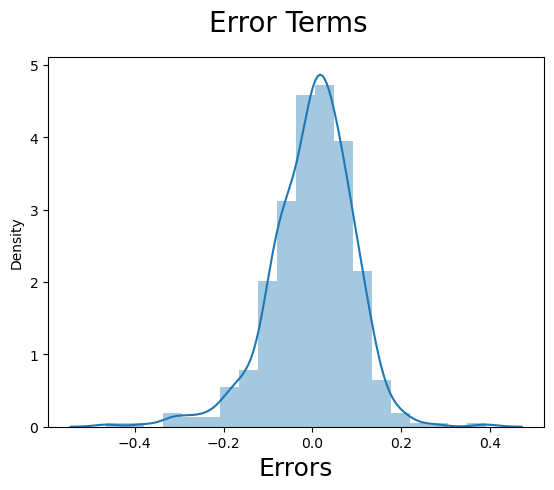

In [102]:
y_train_pred = lm_1g.predict(X_train_lm_1g)
# Plot the histogram of the error terms
fig = pl.figure()
sb.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
pl.xlabel('Errors', fontsize = 18)   

In [103]:
#### Determining r2
r2 = r2_score(y_true=y_train,y_pred=y_train_pred)
r2

0.8268693639273972

In [104]:
X_train_1g.shape

(510, 9)

In [105]:
## Determine adjusted R2 of train
n = X_train_1g.shape[0]
p = X_train_1g.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

In [106]:
adj_r2

0.8237530124780903

##### Making Predictions on model 1g Applying the scaling on the test sets

In [107]:

numeric_var = ['temp','atemp','hum','windspeed','cnt']
df_test[numeric_var] = scaler.transform(df_test[numeric_var])
df_test.head()

# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test
col = X_train_copy_1g.columns

# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[col]

# Adding a constant variable 
X_test_lm_1g = sm.add_constant(X_test_new)

#Making predictions
y_pred = lm_1g.predict(X_test_lm_1g)



In [108]:
### Determine r2 for the test dataset
r2 = r2_score(y_true=y_test,y_pred=y_pred)
r2

0.8148334842575051

In [110]:
X_test_new.shape

(220, 9)

In [111]:
## Determine adjusted R2 of test
n = X_test_new.shape[0]
p = X_test_new.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

In [112]:
adj_r2 

0.8068977764399696

##### Model Evaluation

Text(0, 0.5, 'y_pred')

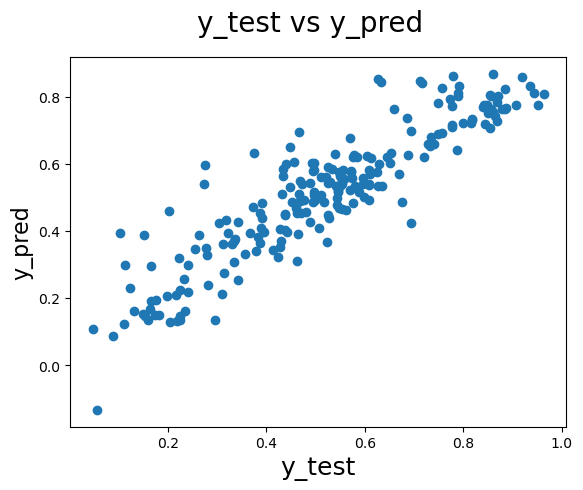

In [121]:
# Plotting y_test and y_pred to understand the spread.
fig = pl.figure()
pl.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
pl.xlabel('y_test', fontsize=18)                          # X-label
pl.ylabel('y_pred', fontsize=16) 

##### Equation of the best fitted model

In [123]:
### cnt = 0.3085  + ( yr * 0.2368 ) - ( holiday * 0.0915) + ( temp * 0.3577 ) - ( windspeed * 0.1445 ) - ( light_shower * 0.2939 ) - ( misty * 0.0790 ) - ( spring * 0.1403 )  + Oct * 0.0590   + ( Sep * 0.0754 )



#### Summary stats of model 1g:
#### train r2 =0.8268693639273972
#### Train adjusted R2 = 0.823753012
#### test r2 = 0.8148334842575051
#### Test Adjusted R2 = 0.806897776
#### Prob (F-statistic):          4.43e-184 appox 0 and states that the model is significant
#### The top 3 predictor feature would be: 
#### 1. temp with coefficient of 0.3577 where every one unit of temp increase there would increase in bike count by 0.3577 units when every other variable is held constant., 
#### 2. yr with coefficient of 0.2368 and where every one unit of yr increase there would increase in bike count by 0.2368 units when every other variable is held constant., 
#### 3. weathersit of category light_shower with coefficient of -0.2939 with respect to clear weathersit where every one unit increase of weathersit category light_shower decreases the bike count by 0.2939 units when every other variable is held constant..
#### Here light_shower variable represents  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 

#### The other features can be interpreted as below:
#### 4. holiday with cofficient of 0.0915 where every one unit of holiday increase there would be decrease in bike count by 0.0915 units when every other variable is held constant.
#### 5. windspeed with cofficient of 0.1445 where every one unit of windspeed increase there would be decrease in bike count by 0.1445 units when every other variable is held constant.
#### 6.weathersit of category misty with coefficient of -0.0790 with respect to clear weathersit where every one unit increase of weathersit category misty decreases the bike count by 0.0790 units when every other variable is held constant. .
#### Here misty  variable represents Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#### 7. Season of category spring with coefficient of -0.1403 with respect to season fall where every one unit increase of season category spring decreases the bike count by 0.1403 units when every other variable is held constant..
#### 8. Month of category Oct with coefficient of 0.0590 with respect to month April where every one unit increase of month category Oct increases the bike count by 0.0590 units when every other variable is held constant. .
#### 9. Month of category Sep with coefficient of 0.0754 with respect to month April where every one unit increase of month category Sep increases the bike count by 0.0754 units when every other variable is held constant.
#### 10. Const  coefficient  0.3085 indicates if everyother  variable is held constant the bike demand would increase by 0.3085 units.
